In [ ]:
import os
os.chdir('..')

In [7]:
from preprocessing.interface import encode_df_text
from preprocessing.embedding import one_hot

from sklearn.metrics import classification_report

from model_utils.learning_curve import plot_learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd

In [3]:
X = pd.read_csv('prepared/lemmatized.csv')
y = pd.read_csv('prepared/target.csv')

X, y = encode_df_text(X, y, 3, 3,  one_hot)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

In [10]:
model = LogisticRegression(penalty = 'l2', C = 1, max_iter = 10)

In [21]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda\envs\kaggle-disaster-tweets\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=10)

In [26]:
print(classification_report((model.predict_proba(X_train)[:, 1] > .5).astype(float), y_train))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91      2457
         1.0       0.86      0.92      0.89      1753

    accuracy                           0.90      4210
   macro avg       0.90      0.90      0.90      4210
weighted avg       0.90      0.90      0.90      4210



In [27]:
print(classification_report((model.predict_proba(X_test)[:, 1] > .5).astype(float), y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      1594
         1.0       0.74      0.77      0.75      1213

    accuracy                           0.78      2807
   macro avg       0.78      0.78      0.78      2807
weighted avg       0.78      0.78      0.78      2807



In [ ]:
p = plot_learning_curve(LogisticRegression(penalty = 'l2', C = 1, max_iter = 10), X, y)

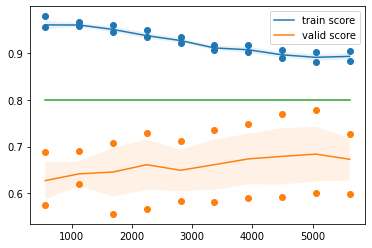

In [24]:
p